## ML Zoom Camp 2022
### Week 3 assignment

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
df = pd.read_csv('../week2/housing.csv')
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity'
]
housing_df = df[features]


### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household`.
 by dividing the column `total_rooms` by the column `households` from dataframe.
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.


In [153]:
# housing_df.info()

In [154]:
housing_df.fillna(0,inplace=True)
print(f'{housing_df.isna().sum()}')
housing_df['rooms_per_household'] = round(housing_df.total_rooms.div(housing_df.households,axis=0)).astype(int)

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [155]:

housing_df['rooms_per_household'] = round(housing_df.total_rooms / housing_df.households).astype(int)
housing_df.rooms_per_household.head(5) 

0    7
1    6
2    8
3    6
4    6
Name: rooms_per_household, dtype: int32

In [156]:
housing_df['bedrooms_per_room'] = housing_df.total_bedrooms / housing_df.total_rooms
housing_df.bedrooms_per_room.head() 


0    0.146591
1    0.155797
2    0.129516
3    0.184458
4    0.172096
Name: bedrooms_per_room, dtype: float64

In [157]:
housing_df['population_per_household'] = round(housing_df.population / housing_df.households).astype(int)
housing_df.population_per_household.head()

0    3
1    2
2    3
3    3
4    2
Name: population_per_household, dtype: int32

### Question 1
What is the most frequent observation (mode) for the column `ocean_proximity`?

let's use info to look into our features:

In [158]:
housing_df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can see that <1H OCEAN value is the most prevelant. 

### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.


In [159]:
SEED = 42

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(housing_df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

assert 'median_house_value' not in df_train.columns
assert 'median_house_value' not in df_val.columns
assert 'median_house_value' not in df_test.columns

We want to see all the categorical columns:

In [160]:
df_full_train.select_dtypes(exclude='number').columns

Index(['ocean_proximity'], dtype='object')

### Question 2

* Create the correlation matrix for the numerical features of your train dataset.
    *    In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?



In [161]:
df_train.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.925005,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.116897,-0.124507,-0.001966
longitude,-0.925005,1.000000,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.033286,0.102320,0.010614
housing_median_age,0.002477,-0.099812,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.179013,0.129456,0.011777
total_rooms,-0.025914,0.036449,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168239,-0.194185,-0.029552
total_bedrooms,-0.059730,0.063840,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.011969,0.078094,-0.034344
population,-0.100272,0.091670,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.075281,0.031592,0.064587
households,-0.063529,0.049762,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.083768,0.058004,-0.032518
median_income,-0.076805,-0.016426,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.388905,-0.616617,0.000353
rooms_per_household,0.116897,-0.033286,-0.179013,0.168239,0.011969,-0.075281,-0.083768,0.388905,1.000000,-0.494542,0.000558
bedrooms_per_room,-0.124507,0.102320,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.494542,1.000000,-0.002683


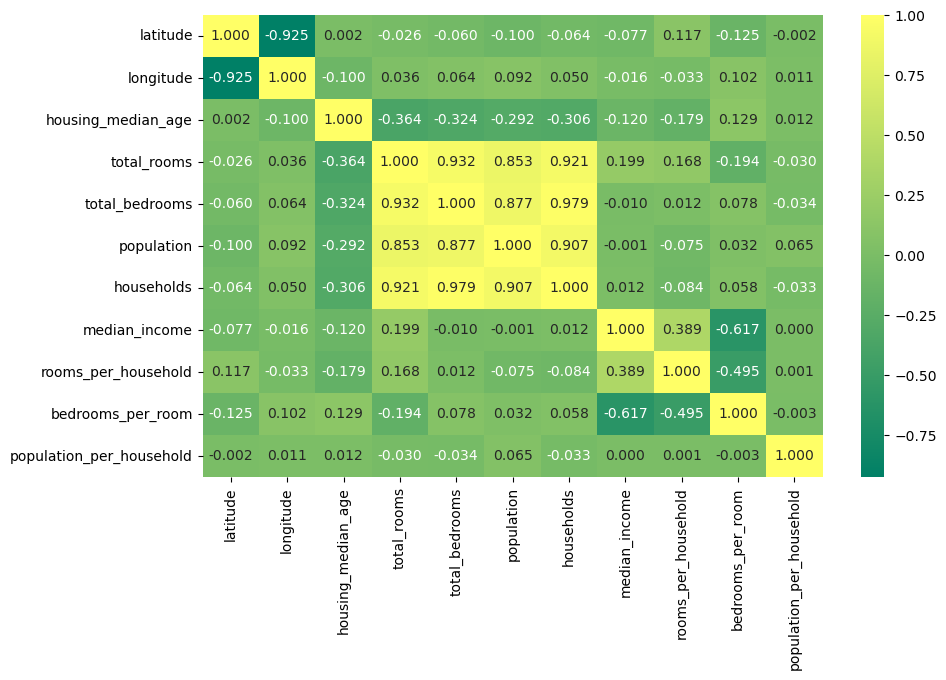

In [162]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), cmap="summer", annot=True, fmt='.3f');

The highest correlation is between `households` and `total_bedrooms` which makes a lot of since because every house must have at least one bedroom.

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.


In [163]:
mean_house_value = df_full_train.median_house_value.mean()
df_full_train['above_average'] = (df_full_train.median_house_value > mean_house_value)

# df_full_train.above_average.value_counts()


### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

In [164]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_full_train.ocean_proximity,df_full_train.above_average)

0.1014306752368672

That was a tough one :)

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


Train The model!

In [165]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [166]:
features.remove('median_house_value')

Always check that you have the correct list:

In [167]:
features

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [168]:
train_dict = df_train[features].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [173]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [169]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=SEED)
model.fit(X_train, y_train)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.05


!st result is 0.05 accuracy. Very Strange.

In [176]:
y_val

array([ 96700.,  75500., 430900., ..., 344200., 387800., 184200.])

In [177]:
y_pred

array([112500.,  86400., 500001., ..., 500001., 500001., 500001.])

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive


This will take a long time. Let's start:

In [170]:
orig_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

KeyboardInterrupt: 